# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
# Importando as bibliotecas
# numpy e pandas para analisar os dados.
# seaborn e matplotlib para visualização dos dados.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
%matplotlib inline

In [3]:
# Importando os dados para o ambiente de trabalho usando o pandas e lendo arquivo csv.

df = pd.read_csv('/content/Profissao- Cientista de Dados_M10_support material.csv')

In [4]:
# Visualizando a base de dados utilizando o head.

df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
# Com o info eu consigo visualizar a quantidade de dados de cada variável e o tipo de dado.
# A única variável que apresenta dados faltantes é o tempo_emprego.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

Primeiro eu preciso saber quais são as minhas variáveis qualitativas, são elas:

sexo, tipo_renda, educacao, estado_civil e tipo_residencia.

In [6]:
# Aloco os dados dentro de uma lista, para poder rotacionar o eixo x dos gráficos.

lista_datas = df.data_ref.unique().tolist()
df.data_ref.unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

In [7]:
# Uso o unique nas variáveis qualitativas para verificar quais são seus possíveis valores.

df.sexo.unique()

array(['F', 'M'], dtype=object)

In [8]:
df.tipo_renda.unique()

array(['Assalariado', 'Empresário', 'Servidor público', 'Pensionista',
       'Bolsista'], dtype=object)

In [9]:
df.educacao.unique()

array(['Secundário', 'Superior completo', 'Superior incompleto',
       'Primário', 'Pós graduação'], dtype=object)

In [10]:
df.estado_civil.unique()

array(['Casado', 'União', 'Solteiro', 'Separado', 'Viúvo'], dtype=object)

In [11]:
df.tipo_residencia.unique()

array(['Casa', 'Com os pais', 'Aluguel', 'Governamental', 'Estúdio',
       'Comunitário'], dtype=object)

[Text(0, 0, '2015-01-01'),
 Text(1, 0, '2015-02-01'),
 Text(2, 0, '2015-03-01'),
 Text(3, 0, '2015-04-01'),
 Text(4, 0, '2015-05-01'),
 Text(5, 0, '2015-06-01'),
 Text(6, 0, '2015-07-01'),
 Text(7, 0, '2015-08-01'),
 Text(8, 0, '2015-09-01'),
 Text(9, 0, '2015-10-01'),
 Text(10, 0, '2015-11-01'),
 Text(11, 0, '2015-12-01'),
 Text(12, 0, '2016-01-01'),
 Text(13, 0, '2016-02-01'),
 Text(14, 0, '2016-03-01')]

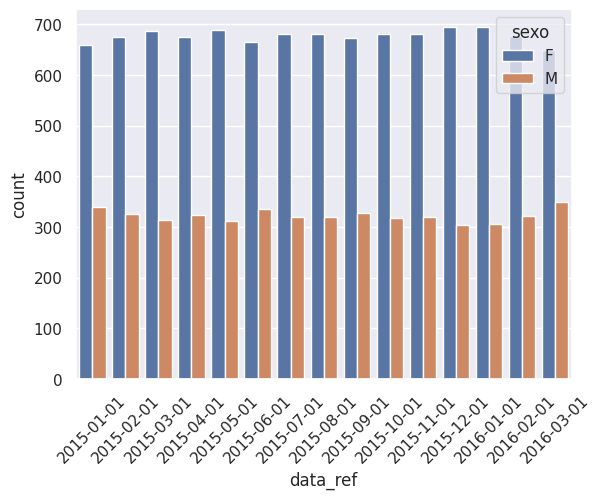

In [12]:
# Agora realizo o plot das variáveis qualitativas com o decorrer do tempo.

# Em relação ao sexo não há grande variação na proporção entre o número de homens e mulheres.

ax = sns.countplot(x='data_ref', hue='sexo', data=df)
ax.set_xticklabels(lista_datas, rotation=45)

In [13]:
# Usando a crosstab verifico que proporção entre homens e mulheres permanece praticamente constante, como pode ser visualizado no gráfico acima.

tab = pd.crosstab(df['data_ref'], df['sexo'])
tab.div(tab.sum(axis=1), axis=0)

sexo,F,M
data_ref,,
2015-01-01,0.660,0.340
2015-02-01,0.675,0.325
2015-03-01,0.687,0.313
2015-04-01,0.676,0.324
2015-05-01,0.689,0.311
2015-06-01,0.665,0.335
2015-07-01,0.681,0.319
2015-08-01,0.681,0.319
2015-09-01,0.673,0.327


[Text(0, 0, '2015-01-01'),
 Text(1, 0, '2015-02-01'),
 Text(2, 0, '2015-03-01'),
 Text(3, 0, '2015-04-01'),
 Text(4, 0, '2015-05-01'),
 Text(5, 0, '2015-06-01'),
 Text(6, 0, '2015-07-01'),
 Text(7, 0, '2015-08-01'),
 Text(8, 0, '2015-09-01'),
 Text(9, 0, '2015-10-01'),
 Text(10, 0, '2015-11-01'),
 Text(11, 0, '2015-12-01'),
 Text(12, 0, '2016-01-01'),
 Text(13, 0, '2016-02-01'),
 Text(14, 0, '2016-03-01')]

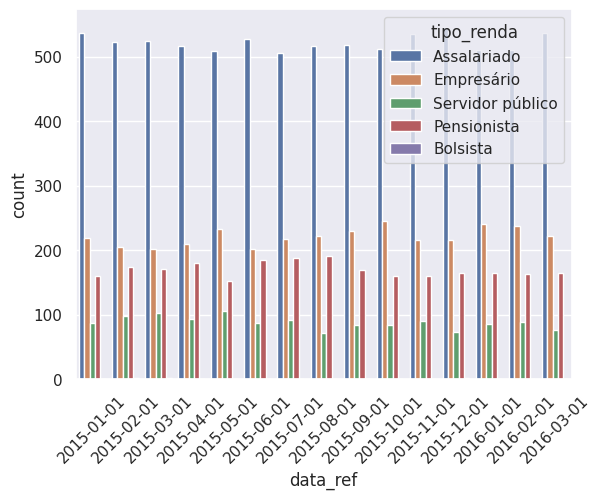

In [14]:
# Em relação ao tipo_renda não há grande variação no decorrer do tempo em suas quantidades.

ax = sns.countplot(x='data_ref', hue='tipo_renda', data=df)
ax.set_xticklabels(lista_datas, rotation=45)

In [15]:
# Usando a crosstab verifico que proporção entre os tipos de renda permanecem praticamente constantes, como pode ser visualizado no gráfico acima.

tab = pd.crosstab(df['data_ref'], df['tipo_renda'])
tab.div(tab.sum(axis=1), axis=0)

tipo_renda,Assalariado,Bolsista,Empresário,Pensionista,Servidor público
data_ref,,,,,
2015-01-01,0.536,0.000,0.218,0.159,0.087
2015-02-01,0.522,0.002,0.204,0.174,0.098
2015-03-01,0.525,0.001,0.201,0.171,0.102
2015-04-01,0.517,0.000,0.210,0.180,0.093
2015-05-01,0.509,0.000,0.233,0.152,0.106
2015-06-01,0.527,0.000,0.201,0.185,0.087
2015-07-01,0.505,0.000,0.217,0.187,0.091
2015-08-01,0.516,0.000,0.222,0.190,0.072
2015-09-01,0.518,0.000,0.229,0.169,0.084


[Text(0, 0, '2015-01-01'),
 Text(1, 0, '2015-02-01'),
 Text(2, 0, '2015-03-01'),
 Text(3, 0, '2015-04-01'),
 Text(4, 0, '2015-05-01'),
 Text(5, 0, '2015-06-01'),
 Text(6, 0, '2015-07-01'),
 Text(7, 0, '2015-08-01'),
 Text(8, 0, '2015-09-01'),
 Text(9, 0, '2015-10-01'),
 Text(10, 0, '2015-11-01'),
 Text(11, 0, '2015-12-01'),
 Text(12, 0, '2016-01-01'),
 Text(13, 0, '2016-02-01'),
 Text(14, 0, '2016-03-01')]

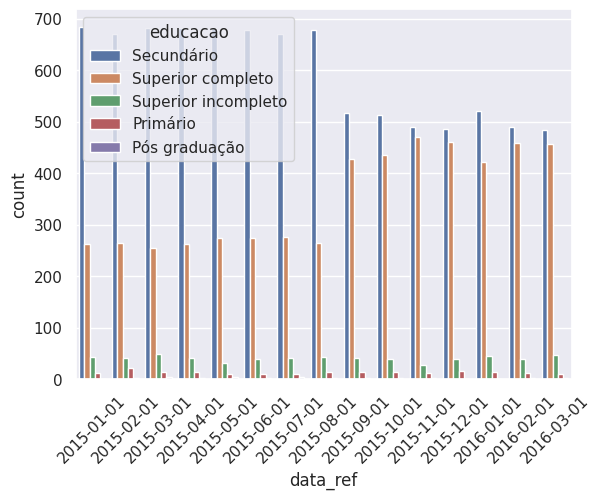

In [16]:
# Em relação à educacao, diferente das demais variáveis, observa-se uma alteração significativa entre o ensino secundário e o superior completo.
# Entre agosto e setembro de 2015 o número de alunos no ensino superior completo aumentou enquanto no sistema secundário diminuiu.
# A mudança ocorreu e depois se manteve para os meses subsequentes.

ax = sns.countplot(x='data_ref', hue='educacao', data=df)
ax.set_xticklabels(lista_datas, rotation=45)

In [17]:
# De agosto para setembro a proporção de alunos com superior completo passa de 265 para 428, enquanto o de ensino secundário passa de 678 para 517.

tab = pd.crosstab(df['data_ref'], df['educacao'])
tab.div(tab.sum(axis=1), axis=0)

educacao,Primário,Pós graduação,Secundário,Superior completo,Superior incompleto
data_ref,,,,,
2015-01-01,0.012,0.000,0.684,0.262,0.042
2015-02-01,0.022,0.001,0.671,0.265,0.041
2015-03-01,0.013,0.003,0.682,0.254,0.048
2015-04-01,0.014,0.001,0.682,0.262,0.041
2015-05-01,0.009,0.003,0.682,0.274,0.032
2015-06-01,0.009,0.001,0.678,0.274,0.038
2015-07-01,0.010,0.003,0.671,0.275,0.041
2015-08-01,0.014,0.001,0.678,0.265,0.042
2015-09-01,0.013,0.001,0.517,0.428,0.041


In [18]:
# Usando o groupby e a soma verifico que a base de dados continua com a mesma quantidade de individuos.

# Sabendo que em cada período de tempo temos 1000 dados, e apenas esses dois valores apresentaram mudanças significativas, entende-se que os dados de secundario passaram para ensino superior.
# De agosto para setembro ensino superior aumentou 161 individuos e ensino secundário diminui 163.
# A única possibilidade consigo observar é que os indivíduos que compunham a base de dados foram modificados.

df.groupby('data_ref')['educacao'].count()

data_ref
2015-01-01    1000
2015-02-01    1000
2015-03-01    1000
2015-04-01    1000
2015-05-01    1000
2015-06-01    1000
2015-07-01    1000
2015-08-01    1000
2015-09-01    1000
2015-10-01    1000
2015-11-01    1000
2015-12-01    1000
2016-01-01    1000
2016-02-01    1000
2016-03-01    1000
Name: educacao, dtype: int64

[Text(0, 0, '2015-01-01'),
 Text(1, 0, '2015-02-01'),
 Text(2, 0, '2015-03-01'),
 Text(3, 0, '2015-04-01'),
 Text(4, 0, '2015-05-01'),
 Text(5, 0, '2015-06-01'),
 Text(6, 0, '2015-07-01'),
 Text(7, 0, '2015-08-01'),
 Text(8, 0, '2015-09-01'),
 Text(9, 0, '2015-10-01'),
 Text(10, 0, '2015-11-01'),
 Text(11, 0, '2015-12-01'),
 Text(12, 0, '2016-01-01'),
 Text(13, 0, '2016-02-01'),
 Text(14, 0, '2016-03-01')]

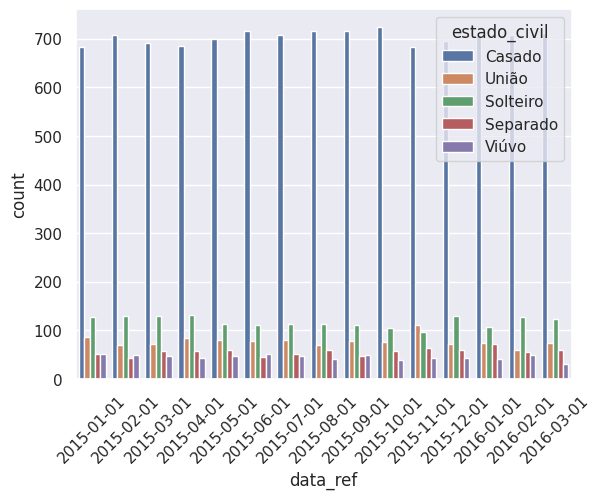

In [19]:
# Usando a crosstab verifico que proporção entre os tipos de estado civil permanecem praticamente constantes, como pode ser visualizado no gráfico acima.

ax = sns.countplot(x='data_ref', hue='estado_civil', data=df)
ax.set_xticklabels(lista_datas, rotation=45)

In [20]:
# Usando a crosstab verifico que proporção entre os tipos de estado civil permanecem praticamente constantes, como pode ser visualizado no gráfico acima.

tab = pd.crosstab(df['data_ref'], df['estado_civil'])
tab.div(tab.sum(axis=1), axis=0)

estado_civil,Casado,Separado,Solteiro,União,Viúvo
data_ref,,,,,
2015-01-01,0.683,0.051,0.128,0.087,0.051
2015-02-01,0.708,0.043,0.130,0.070,0.049
2015-03-01,0.692,0.058,0.130,0.072,0.048
2015-04-01,0.684,0.057,0.132,0.084,0.043
2015-05-01,0.699,0.060,0.113,0.081,0.047
2015-06-01,0.715,0.045,0.110,0.079,0.051
2015-07-01,0.708,0.051,0.113,0.080,0.048
2015-08-01,0.716,0.059,0.113,0.070,0.042
2015-09-01,0.715,0.048,0.110,0.078,0.049


[Text(0, 0, '2015-01-01'),
 Text(1, 0, '2015-02-01'),
 Text(2, 0, '2015-03-01'),
 Text(3, 0, '2015-04-01'),
 Text(4, 0, '2015-05-01'),
 Text(5, 0, '2015-06-01'),
 Text(6, 0, '2015-07-01'),
 Text(7, 0, '2015-08-01'),
 Text(8, 0, '2015-09-01'),
 Text(9, 0, '2015-10-01'),
 Text(10, 0, '2015-11-01'),
 Text(11, 0, '2015-12-01'),
 Text(12, 0, '2016-01-01'),
 Text(13, 0, '2016-02-01'),
 Text(14, 0, '2016-03-01')]

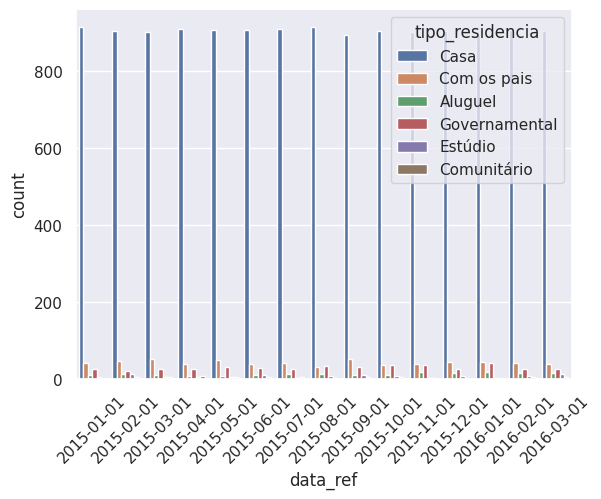

In [21]:
# Usando a crosstab verifico que proporção entre os tipos de residencia permanecem praticamente constantes, como pode ser visualizado no gráfico acima.

ax = sns.countplot(x='data_ref', hue='tipo_residencia', data=df)
ax.set_xticklabels(lista_datas, rotation=45)

In [22]:
# Usando a crosstab verifico que proporção entre os tipos de residencia permanecem praticamente constantes, como pode ser visualizado no gráfico acima.

tab = pd.crosstab(df['data_ref'], df['tipo_residencia'])
tab.div(tab.sum(axis=1), axis=0)

tipo_residencia,Aluguel,Casa,Com os pais,Comunitário,Estúdio,Governamental
data_ref,,,,,,
2015-01-01,0.011,0.913,0.042,0.001,0.006,0.027
2015-02-01,0.012,0.903,0.047,0.004,0.013,0.021
2015-03-01,0.010,0.902,0.052,0.005,0.005,0.026
2015-04-01,0.009,0.910,0.039,0.009,0.006,0.027
2015-05-01,0.007,0.906,0.048,0.004,0.005,0.030
2015-06-01,0.011,0.907,0.038,0.005,0.011,0.028
2015-07-01,0.013,0.909,0.042,0.006,0.003,0.027
2015-08-01,0.012,0.914,0.032,0.002,0.007,0.033
2015-09-01,0.010,0.892,0.053,0.004,0.010,0.031


2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

No caso desse exercício, não é possivel calcular a média de variáveis qualitativas. Então muito provavelmente o que o exercício quer que calculemos a média das variáveis quantitativas.

As variáveis quantitativas são:

qtd_filhos, idade, tempo_emprego, qt_pessoas_residencia e renda.

As variáveis posse_de_veiculo, posse_de_imovel e mau, podem ser considaradas variáveis qualitativas se transformadas em sim e não.

<ipython-input-24-8673bbf65c56>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('data_ref')['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'].mean().plot(figsize=[15,10])


<Axes: xlabel='data_ref'>

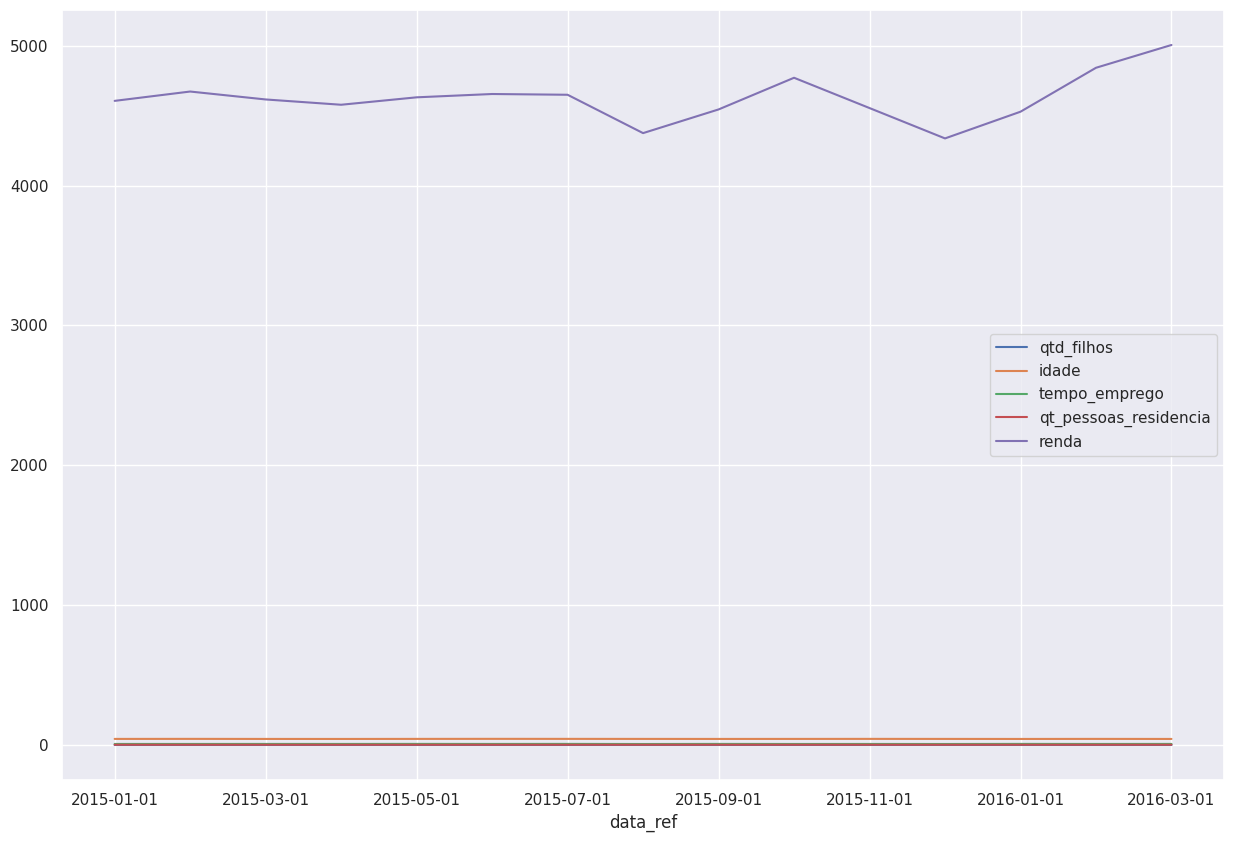

In [24]:
# Aqui eu faço o plot de todas as variáveis no decorrer do tempo.
# O gráfico não ficou bom para se interpretar as variáveis, se são estaveis ou não.
# Então decidi plotar uma por uma.

df.groupby('data_ref')['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'].mean().plot(figsize=[15,10])

In [25]:
# Para visualizar melhor se a variável é estável ou não, decidi plotar a média das variáveis no mesmo gráfico.
# Também calculei o desvio padrão para saber se os valores estão distântes ou não da média.

df['qtd_filhos_media'] = df['qtd_filhos'].mean()

In [26]:
df['qtd_filhos'].std()

0.7605939098901198

<ipython-input-41-40616e1ce60b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  qtd_filhos_g = df.groupby('data_ref')['qtd_filhos', 'qtd_filhos_media'].mean()
<ipython-input-41-40616e1ce60b>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('data_ref')['qtd_filhos', 'qtd_filhos_media'].mean().plot()


<Axes: xlabel='data_ref'>

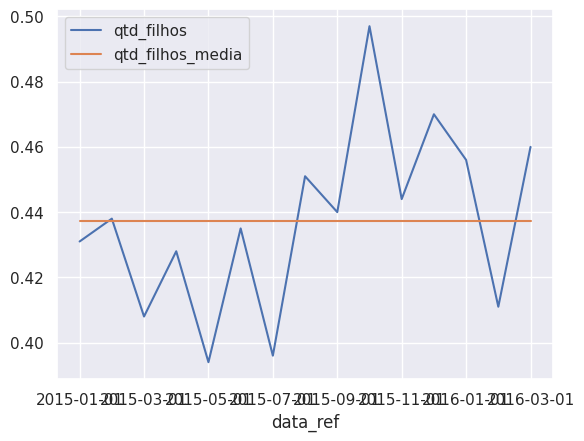

In [41]:
# A qtd_filhos está dentro do intervalo de +- desvio padrão. Mostrando que os valores não estão dispersos, evidenciando estabilidade da variável.

df.groupby('data_ref')['qtd_filhos', 'qtd_filhos_media'].mean().plot()

<Axes: xlabel='data_ref', ylabel='qtd_filhos'>

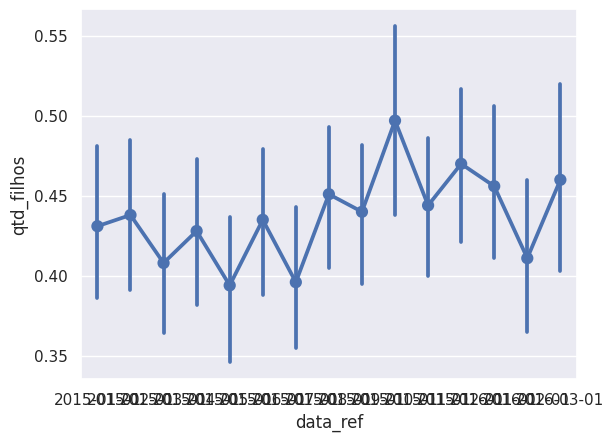

In [45]:
sns.pointplot(x='data_ref',
              y='qtd_filhos',
              data=df,
              dodge=True,
              errorbar=('ci', 95))

In [28]:
df['idade_media'] = df['idade'].mean()

In [29]:
df['idade'].std()

11.229169707662638

<ipython-input-31-6775e8755c4f>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('data_ref')['idade', 'idade_media'].mean().plot()


<Axes: xlabel='data_ref'>

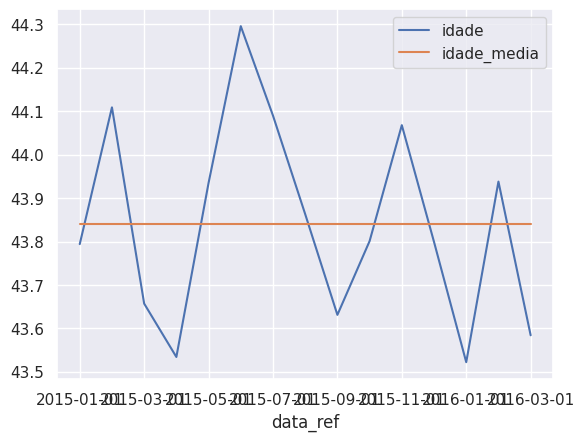

In [31]:
# A idade está dentro do intervalo de +- desvio padrão. Mostrando que os valores não estão dispersos, evidenciando estabilidade da variável.

df.groupby('data_ref')['idade', 'idade_media'].mean().plot()

<Axes: xlabel='data_ref', ylabel='idade'>

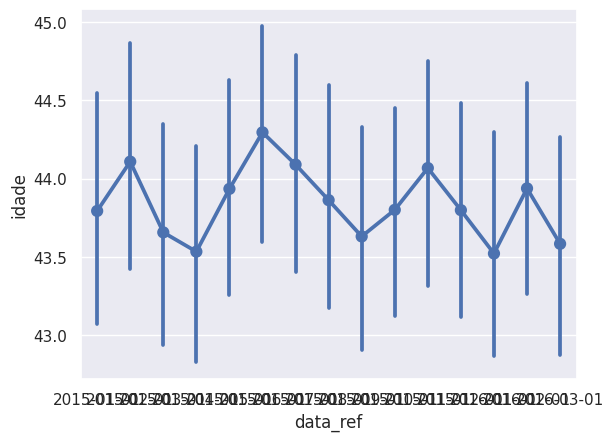

In [46]:
sns.pointplot(x='data_ref',
              y='idade',
              data=df,
              dodge=True,
              errorbar=('ci', 95))

In [32]:
df['tempo_emprego_media'] = df['tempo_emprego'].mean()

In [33]:
df['tempo_emprego'].std()

6.7802164260173745

<ipython-input-34-766e29b5af66>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('data_ref')['tempo_emprego', 'tempo_emprego_media'].mean().plot()


<Axes: xlabel='data_ref'>

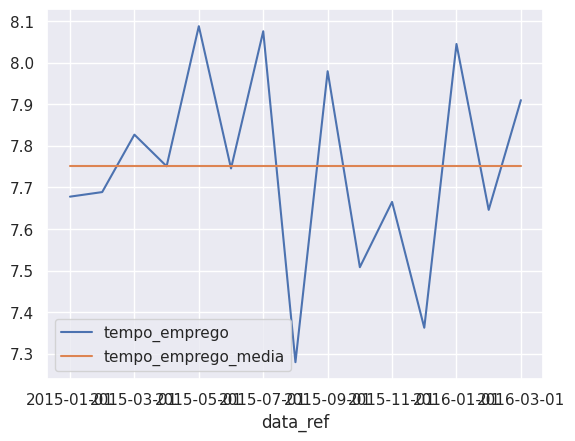

In [34]:
# O tempo_emprego está dentro do intervalo de +- desvio padrão. Mostrando que os valores não estão dispersos, evidenciando estabilidade da variável.

df.groupby('data_ref')['tempo_emprego', 'tempo_emprego_media'].mean().plot()

<Axes: xlabel='data_ref', ylabel='tempo_emprego'>

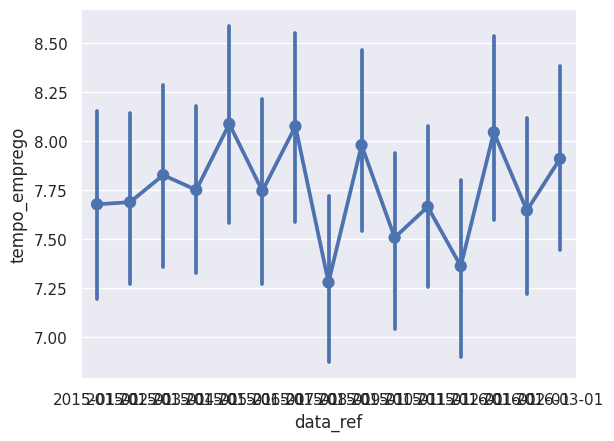

In [48]:
sns.pointplot(x='data_ref',
              y='tempo_emprego',
              data=df,
              dodge=True,
              errorbar=('ci', 95))

In [35]:
df['qt_pessoas_residencia_media'] = df['qt_pessoas_residencia'].mean()

In [36]:
df['qt_pessoas_residencia'].std()

0.9223519814948123

<ipython-input-37-7804c2c51d0d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('data_ref')['qt_pessoas_residencia', 'qt_pessoas_residencia_media'].mean().plot()


<Axes: xlabel='data_ref'>

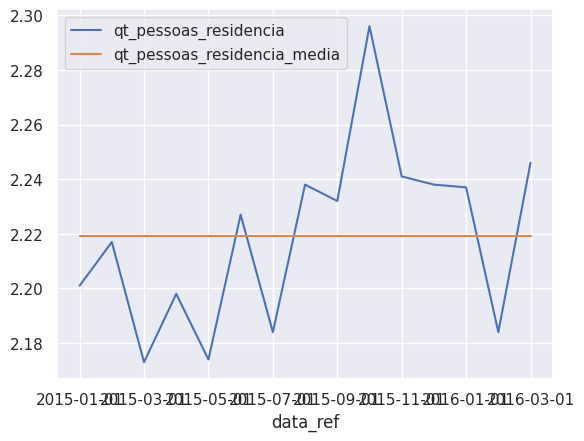

In [37]:
# A qt_pessoas_residencia está dentro do intervalo de +- desvio padrão. Mostrando que os valores não estão dispersos, evidenciando estabilidade da variável.

df.groupby('data_ref')['qt_pessoas_residencia', 'qt_pessoas_residencia_media'].mean().plot()

<Axes: xlabel='data_ref', ylabel='qt_pessoas_residencia'>

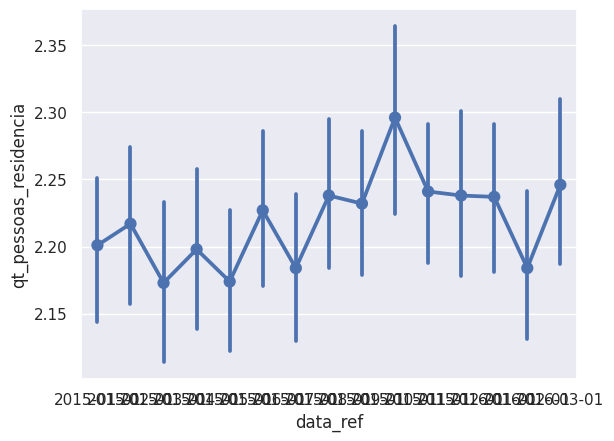

In [50]:
sns.pointplot(x='data_ref',
              y='qt_pessoas_residencia',
              data=df,
              dodge=True,
              errorbar=('ci', 95))

In [38]:
df['renda_media'] = df['renda'].mean()

In [39]:
df['renda'].std()

4628.571729203342

<ipython-input-40-db83f3af53af>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('data_ref')['renda', 'renda_media'].mean().plot()


<Axes: xlabel='data_ref'>

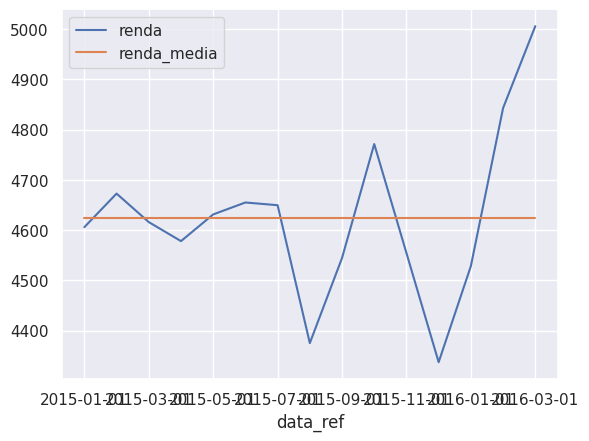

In [40]:
df.groupby('data_ref')['renda', 'renda_media'].mean().plot()

<Axes: xlabel='data_ref', ylabel='renda'>

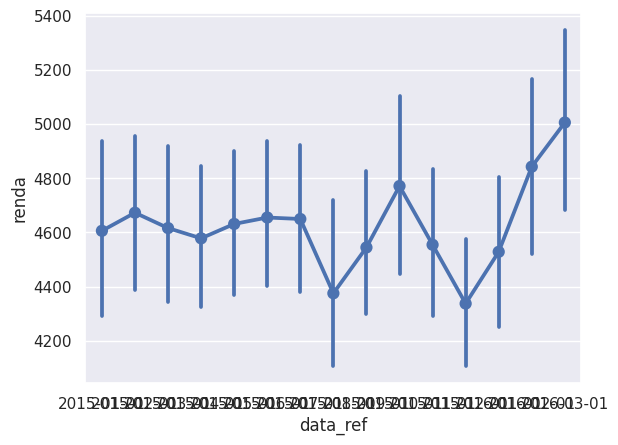

In [51]:
sns.pointplot(x='data_ref',
              y='renda',
              data=df,
              dodge=True,
              errorbar=('ci', 95))

Ao meu ver as variáveis quantitativas estão bem estáveis, contudo apresentam pequenas oscilações em determinados períodos, como por exemplo a renda, que apresentou uma oscilação muito maior no quatro últimos períodos.

Acredito que as variáveis possam ser utilizadas em modelagens, pois apresentam um grau de estabilidade considerável, dado que não se distanciam tanto da média global.

A única variável que ficaria com o pé atrás seria a renda, pois apresenta uma oscilação muito maior que as demais variáveis.